  # Movies EDA 

### **1.0 Importing Libraries**


In [1]:
import numpy as np  
import seaborn as sns 
import matplotlib.pyplot as plt 
import pandas as pd 
import ast 


### **2.0 Importing the data**

In [4]:
path = r"C:\Users\edwar\Documents\GitHub\reimagined-enigma\TMDB_movies.csv (1)"


df = pd.read_csv(path) 

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\edwar\\Documents\\GitHub\\reimagined-enigma\\TMDB_movies.csv (1)'

### **3.0 Initial analysis**

* No redundant columns 
* Some columns are made up of dictionaries

In [3]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
df.shape
## 4803 rows
## 20 columns

(4803, 20)

In [5]:
df.dtypes;
## 4 int
## 3 float
## 13 object

In [6]:
df.info()
## Nulls found

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

### **4.0 nulls**

In [7]:
null_df = df.isnull() ## Creating a table of nulls
null_df.sum() ## Summing the nulls in each of the columns

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

#### **4.1 Investigating the rows with nulls in release_date, overview, and runtime**

In [8]:
overview_nulls = df[df['overview'].isnull()] ## returning rows with nulls in the overview column
overview_nulls.head();

In [9]:
release_date_nulls = df[df['release_date'].isnull()] ## returning rows with nulls in the release_date column
release_date_nulls.head();

In [10]:
runtime_nulls = df[df['runtime'].isnull()] ## returning rows with nulls in the runtime column
runtime_nulls.head();

#### **4.2 Dropping the rows with nulls**
* These rows were also found to have strange values such as zero or empty lists in other columns
* Two of the rows had nulls in both the runtime, and the overview column
* Only a small number of rows so can be dropped
* Nulls in tagline and homepage columns ignored as missingness is MCAR and cannot be inferred

In [11]:

df.dropna(
    axis = 0,  ## dropping rows
    how = 'any',  ## drops any rather than all rows 
    subset = ['overview', 'release_date', 'runtime'],  ## selecting specific columns
    inplace = True) ## modifying the dataframe rather than making a copy 

In [12]:
df.shape  ## check for rows and columns again 

(4799, 20)

### **5.0 Altering table for easier analysis**

#### **5.1 Extracting the genre values from the dictionaries they are in and creating a new column with these values in as a string.**

In [13]:
def extract_genres(movie):  ## Code written by Alex on discord
    ''' Take a single movie's genres and make them into a comma separated string '''
    movie = ast.literal_eval(movie) ## make sure it's a list!
    
    genres = [x['name'] for x in movie] ## Get a list of all genres
    
    return ",".join(genres) ## Join them all together as a string
## Function to extract the values from the dictionaries in the genres column

In [14]:
df['extracted_genres'] = df['genres'].apply(extract_genres)
## Using the function to create a new column called extracted_genres

#### **5.2 Doing the same for countries**

In [15]:
df['extracted_production_countries'] = df['production_countries'].apply(extract_genres)

#### **5.3 Converting the comma seperated strings in these new columns into lists**

In [16]:
df['extracted_genres'] = df['extracted_genres'].str.split(',')
df['extracted_production_countries'] = df['extracted_production_countries'].str.split(',')

#### **5.4 Exploding these lists using the .explode() method to group by genre/production country and give a count**

In [17]:
##Solution of using the .explode() method found using generative AI
g_exploded = df.explode('extracted_genres') ##exploding the lists into individual rows
genre_counts = g_exploded['extracted_genres'].value_counts().reset_index() ## Creating a count
genre_counts.columns = ['Genre', 'Count'] ## Putting the new data into a new dataframe 

In [18]:
## Doing the same for countries 
c_exploded = df.explode('extracted_production_countries')
country_counts = c_exploded['extracted_production_countries'].value_counts().reset_index()
country_counts.columns = ['Production_country', 'Count']

In [19]:
genre_counts
## count of 27 for " "

,Genre,Count
0,Drama,2296
1,Comedy,1722
2,Thriller,1274
3,Action,1154
4,Romance,894
5,Adventure,790
6,Crime,696
7,Science Fiction,535
8,Horror,519
9,Family,513


In [20]:
country_counts

,Production_country,Count
0,United States of America,3956
1,United Kingdom,635
2,Germany,324
3,France,306
4,Canada,261
...,...,...
84,Panama,1
85,Portugal,1
86,Ukraine,1
87,Serbia,1


### **6.0 conducting visualisations and analysis**

#### **6.1 Checking for any strong correlations between numerical columns**
* vote_count is correlated to popularity and revenue at 0.78
* budget and revenue are also positively correlated at 0.73 suggesting films with larger budgets are more likely to yeild higher revenue
* No significantly negative correlations

<Axes: >

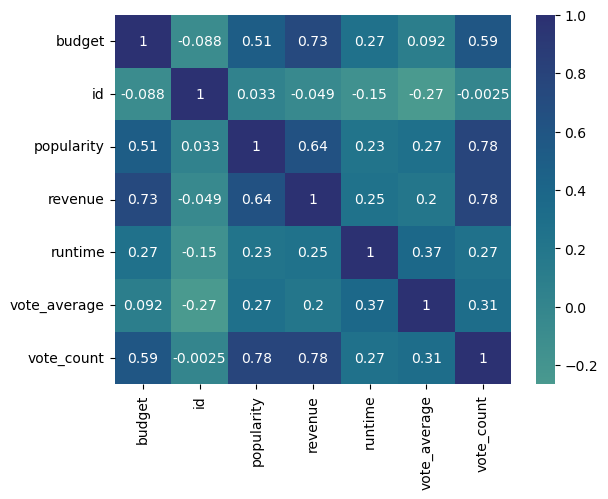

In [21]:
sns.heatmap(df.corr(numeric_only=True),
            annot = True,
            cmap = 'crest', 
            center = 0)

#### **6.2 The relationship between budget and revenue**

* Overall positive trend as shown in the heat map
* **KEY POINT 1** - the film with the highest revenue is so succesful it is a clear outlier gorssing over half a million more than the second highest

C:\Users\edwar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x1000 with 0 Axes>

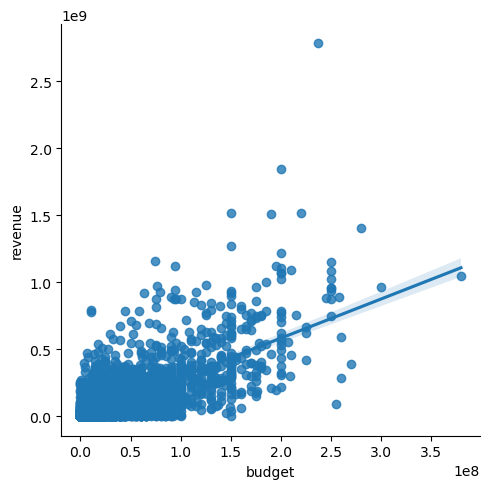

In [22]:
plt.figure (figsize = (10,10))
sns.lmplot(data = df,
           x = 'budget',
           y = 'revenue')
plt.show()

#### **6.3 Top 5 Countries by Count of Film**

In [23]:
sorted_country_counts = country_counts.sort_values(by='Count', ascending=False)  ## Sorting the count of films by country
top_5_countries = sorted_country_counts.head(5) ## assigning the top 5 to a variable


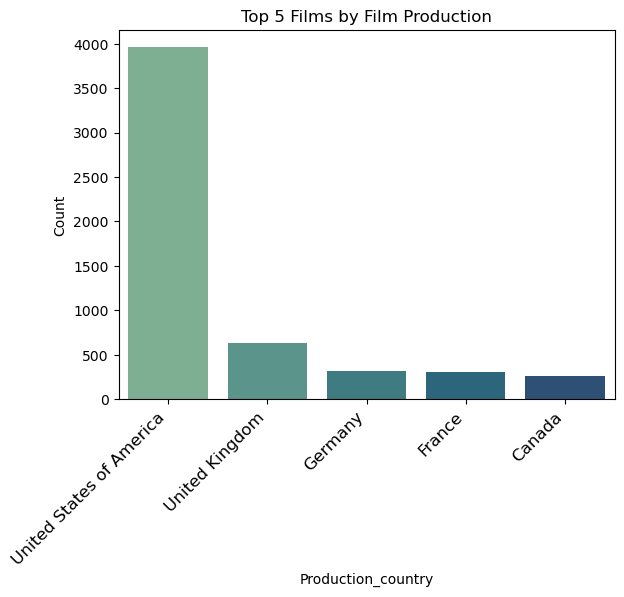

In [24]:
## Creating a barplot of the the count of films for the top 5 countries 
sns.barplot(data = top_5_countries,
            x = 'Production_country',
            y = 'Count',
            palette = 'crest')
plt.title('Top 5 Films by Film Production')
plt.xticks(rotation = 45,
           horizontalalignment = 'right',
           fontweight = 'light',
           fontsize = 'large',
          )
plt.show()

* **KEY POINT 2** The United States of America is dominating the dataset, having produced 3,956 films
* This accounts for having been involved with the prdoduction of 82% of films in the dataset

In [25]:
country_counts['percentage'] = round((country_counts['Count'] / 4799) * 100)  ## count of films produced in the USA / Count of films in the database to give a percentage
country_counts.head(1)

,Production_country,Count,percentage
0,United States of America,3956,82.0


### **8.0 Movie Anlaysis**

#### **8.1 The highest grossing film**

In [26]:
highest_grossing_film = df[['title', 'budget', 'popularity', 'revenue', 'vote_average']].sort_values('revenue', ascending = False).head(1).copy()  
## Creating a new data frame with selected columns and sorting by highest revenue and limiting to one

In [27]:
highest_grossing_film['profit'] = highest_grossing_film['revenue'] - highest_grossing_film['budget']
highest_grossing_film
## creating a profit column: revenue - budget

,title,budget,popularity,revenue,vote_average,profit
0,Avatar,237000000,150.437577,2787965087,7.2,2550965087


In [28]:
average_rating = round(df['vote_average'].mean().copy(), 2)
average_rating
## finding the average rating

6.09

* The film with the highest revenue in the dataset is Avatar
* Budget = 237 Million
* Revenue = 2.8 billion
* It made a profit of just over 2.5 billion
* It has an significantly above average rating (6.09) with 7.2

#### **8.2 The Worst Rated Film**

In [29]:
worst_rated_film = df[['title', 'budget', 'popularity', 'revenue', 'vote_average', 'vote_count']].where(df['vote_count'] > 1000).sort_values('vote_average', ascending = True).head(1).copy()
## Creating a new data frame with selected columns and sorting by lowest vote_average and limiting to one
worst_rated_film['profit'] = worst_rated_film['revenue'] - worst_rated_film['budget']
## creating another profit column
worst_rated_film

,title,budget,popularity,revenue,vote_average,vote_count,profit
3746,The Boy Next Door,4000000.0,24.161735,52425855.0,4.1,1022.0,48425855.0


* The worst rated film in the dataset is The Boy Next Door
* It is rated a 4.1 which is over below the average for the dataset by 2.3!
* It managed to make a profit of around 48.5 million which is impressive considering it had a budget of 4 million

In [30]:
## Creating a set to find duplicates 
unique_id = set(df.id)

len(unique_id)

4799

In [31]:
unique_title = set(df.title)

len(unique_title)

4796

In [32]:
## Double checking for any more potential duplicates in the title column
## Creating a new set to add the stripped lower case titles to
title_set = set()

## Lowercasing and stripping titles to avoid
for title in unique_title:
    title_set.add(title.lower().strip())

## Checking the length of the set again
len(title_set)

## Length is still the same

4796

Number of rows = 4799
* We have 3 rows with the same title
* IDs are all unique

In [33]:
df2 = df[df['title'].duplicated() == True] ##creating a df of the duplicates to investigate at a later time
df2

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,extracted_genres,extracted_production_countries
2877,11000000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 18, ""nam...",http://www.hostmovie.com/,1255,"[{""id"": 1261, ""name"": ""river""}, {""id"": 1880, ""...",ko,괴물,Gang-du is a dim-witted man working at his fat...,27.655270,"[{""name"": ""Cineclick Asia"", ""id"": 685}, {""name...",...,88489643,119.0,"[{""iso_639_1"": ""ko"", ""name"": ""\ud55c\uad6d\uc5...",Released,Monsters are real.,The Host,6.7,537,"[Horror, Drama, Science Fiction]",[South Korea]
3693,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,10844,"[{""id"": 2658, ""name"": ""new zealand""}, {""id"": 3...",en,Out of the Blue,Ordinary people find extraordinary courage in ...,0.706355,[],...,0,103.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The true story of a small town massacre,Out of the Blue,5.9,18,[Drama],[New Zealand]
4267,1377800,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 12, ""...",NaN,2661,"[{""id"": 339, ""name"": ""submarine""}, {""id"": 849,...",en,Batman,The Dynamic Duo faces four super-villains who ...,9.815394,"[{""name"": ""Twentieth Century Fox Film Corporat...",...,0,105.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,He's Here Big As Life In A Real Bat-Epic,Batman,6.1,203,"[Family, Adventure, Comedy, Science Fiction, C...",[United States of America]
